# Supervised Learning
- Categorical: Classification problem
  1. | Class | = 2, Binary Classitication
  1. | Class | > 2, Multi-class Classitication
- Real values: Regression problem
***

# Linear Regression

### Simple Linear Regression
==========================================  

Predictor: $\hat y = \theta_0 + \theta_1 X$  
$~~~~~~~~~~~~~~~X = [1~x]^T$  
$~~~~~~~~~~~~~~~\theta = [~\theta_0~\theta_1~]^T$  

==========================================  

Choose an objective function to minimzie. $\hat y \approx y$  
Typically we choose sum square error (SSE)  

========================================== 

$J(\theta_0 , \theta_1) = \frac{1}{2n}\sum ((\theta_0 + \theta_1 X) - y)^2$

Set  
  $\frac{\partial{J(\theta_0 , \theta_1)}}{\partial{\theta_0}} = 0 $ and $\frac{\partial{J(\theta_0 , \theta_1)}}{\partial{\theta_1}} = 0 $  
  
========================================== 
***
### Multiple Linear Regression  

==========================================  
Predictor: $\hat y = \theta X$  
n筆資料, d維向量  
$
X=
\begin{bmatrix}
  1 & x_{1,1} & ... & x_{1,d} \\
  . & . & ... . \\
  1 & x_{n,1} & ... & x_{n,d} \\
\end{bmatrix}  
$  

$
y=
\begin{bmatrix}
  y_{1} \\
  .     \\
  y_{n} \\
\end{bmatrix}  
$  

$
\theta=
\begin{bmatrix}
  \theta_{0} \\
  \theta_{1} \\
  .          \\
  \theta_{n} \\
\end{bmatrix}  
$

Find $\theta$ such that $(\hat y-y)^T(\hat y-y)$ is minimized. 

$J(\theta) = \frac{1}{2}(\theta X-y)^T(\theta X-y)$  
Set  
$\triangledown J(\theta) = 0$  
The solution is $\theta = (X^TX)^{-1}X^Ty$

==========================================  

***
### Gradient Descent (Another way to find $\theta$)
- Gradient Descent (GD)  

==========================================  

$
  \begin{aligned}
   Procedure:  &\\
    &Start~with~random~values:  \\
    &~~~~\theta^{(0)} = (\theta_0^{(0)},\theta_1^{(0)},...\theta_d^{(0)})  \\
    & Slightly~move~(\theta_0 ...\theta_d)~to~reduce~J(\theta)  \\
    &~~~\theta_i^{(k+1)} = \theta_i^{(k)} +  \alpha \frac{\partial{J(\theta)}}{\partial{\theta_i}}|_{\theta=(\theta^k)} \\
    & k = k + 1  \\
    & keep~step~2~until~converges
  \end{aligned} 
  $
  
  Here $\alpha$ is a small positive number
  
  ==========================================  

- Stochastic Gradient Descent (SGD)  
  Optimize "one sample" at a time  
  優點  
  1. 因為一次只train一筆, large data時SGD會比GD快收斂  
  因為有可能GD要看大部分重複效果的資料, SGD只要幾筆就夠了
  1. 當只有一個極值時, GD, SGD都可以走到谷底, 有多個極值GD可能掉在local minimum,  
  SGD有機會繼續往global minimum走
  1. 可以online learning  
  
  缺點  
  1. Tends to bouncing around the minium  
  有可能在極值附近擺動(因為單筆資料差異性較大)
  
  ==========================================  
  
  $
  \begin{aligned}
   Procedure:  &\\
    &k := 0  \\
    &Initialize~\theta^{(k)}  \\
    &While~Not~Converge:  \\
    &~~~~g :=  x_i(x_i^T\theta^{(k)}-y_i)+\lambda\theta^{(k)} \\
    &~~~~\theta^{(k+1)} :=  \theta^{(k)} - \alpha g \\
    &~~~~k := k + 1  \\
    &~~~~Get~next~data~instance~i
  \end{aligned} 
  $  
  
  ==========================================  
      
- Mini-batch Gradient Descent  
  Optimize "few sample" at a time 
  
  ==========================================  
  
  $
  \begin{aligned}
   Procedure:  &\\
    &k := 0  \\
    &Initialize~\theta^{(k)}  \\
    &While~Not~Converge:  \\
    &~~~~g :=  x_{i:j}(x_{i:j}^T\theta^{(k)}-y_{i:j})+\lambda\theta^{(k)} \\
    &~~~~\theta^{(k+1)} :=  \theta^{(k)} - \alpha g \\
    &~~~~k := k + 1  \\
    &~~~~Get~next~data~batch~(i,i+1,...j,)
  \end{aligned} 
  $  
  
  ==========================================  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import metrics
import random
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5
#from sklearn.metrics import mean_absolute_error
%matplotlib inline


# Generate Sin(x) Dataset

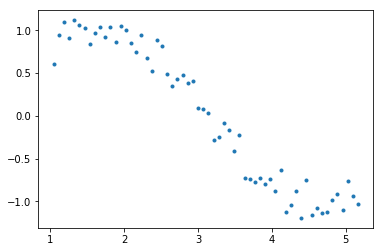

In [8]:
# define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
#Setting seed for reproducability
np.random.seed(100)
#加上雜訊
y = np.sin(x) + np.random.normal(0,0.15,len(x))
# x 60個元素的ndarray
# y 60個元素的ndarray
# np.vstack([x,y]) --> 2x60
# np.hstack([x,y]) --> 120
# np.column_stack([x,y]) --> 60x2

data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

# Generate New Features with higher power 
(使用Linear Regression產生Nonlinear部分)  
自行產生新的feature，x^2～x^15

In [9]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,0.603561,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.950196,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.100139,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.913191,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.117494,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


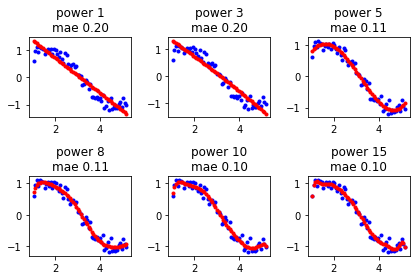

,rss,intercept,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,coef_10,coef_11,coef_12,coef_13,coef_14
pow_ 1,3.70594,2.00865,-0.646345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 3,3.67534,1.86713,-0.538981,-0.0172796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 5,1.05834,-1.11936,2.93328,-1.14519,0.0873827,0.005084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 8,0.980195,-18.8772,54.1754,-60.6814,36.297,-12.5024,2.46658,-0.258479,0.0111566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_10,0.939004,-70.3149,230.857,-314.807,236.904,-108.082,30.8489,-5.46405,0.568752,-0.0301883,0.000540233,NaN,NaN,NaN,NaN,NaN


In [10]:
x = np.array([ i*np.pi/180 for i in range(60,300,4) ])
np.random.seed(100) 
y = np.array(np.sin(x)) + np.random.normal(0,0.15,len(x))

df = pd.DataFrame(np.column_stack([x, y]), columns=['x','y'])

for i in range(2,15):
    df['x_%d'%i] = x**i

coef_string = []
for i in range(1,15):
    coef_string.extend(['coef_%d'%i])
    
def train(drawflag,df,power):
    plt.subplot(drawflag)
    plt.tight_layout()
    x_string = ['x']
    for i in range(2,power):
        x_string.extend(['x_%d'%i])
    
    model = LinearRegression()
    model.fit(df[x_string],df['y'])
    predict = model.predict(df[x_string])
    mae=metrics.mean_absolute_error(df[['y']], predict)
    coef_string = []
    for i in range(1,power):
        coef_string.extend(['coef_%d'%i])
        
    #cof_df['intercept'] = model.intercept_
    #cof_df.loc[:,coef_string]= model.coef_
    rss = sum((predict-df['y'])**2)
    #cof_df['rss'] = rss
    
    plt.plot(x,y,'.',c='b')
    plt.plot(x,predict,'.',c='r')
    plt.title('power %d'%power +'\n'+'mae %.2f'%mae)
    ret = [rss]
    ret.extend([model.intercept_])
    ret.extend(model.coef_)
    return ret,len(ret)

cof_df_column = ['rss']
cof_df_column.extend(['intercept'])
cof_df_column.extend(coef_string) 
cof_df = pd.DataFrame([], columns=cof_df_column,index=['pow_%2d'%i for i in range(1,16)])



val,size = train(231,df,1)
cof_df.iloc[0,0:size]= val
val,size = train(232,df,3)
cof_df.iloc[2,0:size]= val
val,size = train(233,df,5)
cof_df.iloc[4,0:size]= val
val,size = train(234,df,8)
cof_df.iloc[7,0:size]= val
val,size = train(235,df,10)
cof_df.iloc[9,0:size]= val
val,size = train(236,df,15)
cof_df.iloc[14,0:size]= val


plt.show()
cof_df

## Overfitting
- Lasso regression  
$ J(\theta) = \frac{1}{2}(\hat y-y)^T(\hat y-y)+\lambda||\theta||$  
- Ridge regression  
$ J(\theta) = \frac{1}{2}(\hat y-y)^T(\hat y-y)+\lambda||\theta||^2$  
- Elastic-Net  
  Combine Lasso and Ridge  
  $\theta := arg~min_\theta[\sum{(\hat{y}-y)^2}+\lambda_1||\theta_1||+\lambda_1||\theta_2||^2]$

### Lasso regression  
可用來Feature Selection

/Users/neo/.local/share/virtualenvs/jupyter_text-14LgYBbB/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


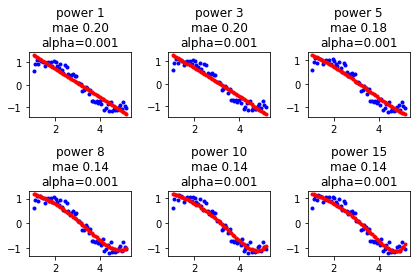

,rss,intercept,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,coef_10,coef_11,coef_12,coef_13,coef_14
pow_ 1,3.70954,1.98874,-0.639939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 3,3.67895,1.85382,-0.537507,-0.016494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 5,3.06966,1.5439,-0.198165,-0.108016,-0,0.00150184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 8,2.00219,1.33628,-0,-0.133138,-0.00246996,-0,-0,0,1.57572e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_ 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pow_10,1.8348,1.29587,-0,-0.117663,-0.00439764,-0,-0,0,0,0,5.90832e-07,NaN,NaN,NaN,NaN,NaN


In [11]:
# Lasso alpha = 1e-3, different power
x = np.array([ i*np.pi/180 for i in range(60,300,4) ])
np.random.seed(100) 
y = np.array(np.sin(x)) + np.random.normal(0,0.15,len(x))

df = pd.DataFrame(np.column_stack([x, y]), columns=['x','y'])

for i in range(2,15):
    df['x_%d'%i] = x**i

coef_string = []
for i in range(1,15):
    coef_string.extend(['coef_%d'%i])
    
def train(drawflag, regression_type,df,power,alpha):
    type_dict = {
        'Lasso':Lasso(alpha = alpha, normalize=True),
        'Ridge':Ridge(alpha = alpha, normalize=True)}
    plt.subplot(drawflag)
    plt.tight_layout()
    x_string = ['x']
    for i in range(2,power):
        x_string.extend(['x_%d'%i])
    if regression_type in type_dict:
        model = type_dict[regression_type]
    model.fit(df[x_string],df['y'])
    predict = model.predict(df[x_string])
    mae=metrics.mean_absolute_error(df[['y']], predict)
    coef_string = []
    for i in range(1,power):
        coef_string.extend(['coef_%d'%i])
        
    #cof_df['intercept'] = model.intercept_
    #cof_df.loc[:,coef_string]= model.coef_
    rss = sum((predict-df['y'])**2)
    #cof_df['rss'] = rss
    
    plt.plot(x,y,'.',c='b')
    plt.plot(x,predict,'.',c='r')
    plt.title('power %d'%power +'\n'+'mae %.2f'%mae+'\n'+'alpha=%.3f'%alpha)
    ret = [rss]
    ret.extend([model.intercept_])
    ret.extend(model.coef_)
    return ret,len(ret)

cof_df_column = ['rss']
cof_df_column.extend(['intercept'])
cof_df_column.extend(coef_string) 
cof_df = pd.DataFrame([], columns=cof_df_column,index=['pow_%2d'%i for i in range(1,16)])



val,size = train(231,'Lasso',df,1,1e-3)
cof_df.iloc[0,0:size]= val
val,size = train(232,'Lasso',df,3,1e-3)
cof_df.iloc[2,0:size]= val
val,size = train(233,'Lasso',df,5,1e-3)
cof_df.iloc[4,0:size]= val
val,size = train(234,'Lasso',df,8,1e-3)
cof_df.iloc[7,0:size]= val
val,size = train(235,'Lasso',df,10,1e-3)
cof_df.iloc[9,0:size]= val
val,size = train(236,'Lasso',df,15,1e-3)
cof_df.iloc[14,0:size]= val


plt.show()
cof_df

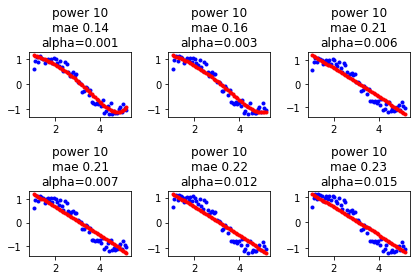

,rss,intercept,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,coef_10,coef_11,coef_12,coef_13,coef_14
alpha_0.001,1.8348,1.29587,-0,-0.117663,-0.00439764,-0,-0,0,0,0,5.90832e-07,NaN,NaN,NaN,NaN,NaN
alpha_0.003,2.39095,1.36332,-0.0977606,-0.10554,-0,-0,-0,0,0,0,3.29701e-07,NaN,NaN,NaN,NaN,NaN
alpha_0.006,3.80575,1.77515,-0.521291,-0.0139478,-0,-0,-0,-0,0,0,0,NaN,NaN,NaN,NaN,NaN
alpha_0.007,3.85287,1.75942,-0.518052,-0.0134379,-0,-0,-0,-0,0,0,0,NaN,NaN,NaN,NaN,NaN
alpha_0.012,4.19729,1.68079,-0.50187,-0.0108864,-0,-0,-0,-0,-0,-0,-0,NaN,NaN,NaN,NaN,NaN
alpha_0.015,4.49098,1.63366,-0.49219,-0.00935109,-0,-0,-0,-0,-0,-0,-0,NaN,NaN,NaN,NaN,NaN


In [12]:
# Lasso alpha = 0.001, 0.003..., fix power

cof_df_column = ['rss']
cof_df_column.extend(['intercept'])
cof_df_column.extend(coef_string) 
alpha = [1e-3,3e-3,6e-3,7e-3,12e-3,15e-3] 
alpha_string = [1e-3,3e-3,6e-3,7e-3,12e-3,15e-3] 
cof_df = pd.DataFrame([], columns=cof_df_column,index=['alpha_%.3f'%i for i in alpha])

power=10
for i in range(6):
    drawflag = 231+i
    val,size = train(drawflag,'Lasso',df,power,alpha[i])
    cof_df.iloc[i,0:size]= val

plt.show()
cof_df

### Ridge regression  

$ J(\theta) = \frac{1}{2}(\hat y-y)^T(\hat y-y)+\frac{\lambda}{2}||\theta||^2$  
$ \nabla J(\theta)^T = X^T(X\theta-y)+\lambda\theta $
 
$
  \begin{aligned}
   Procedure:  &\\
    &k := 0  \\
    &Initialize~\theta^{(k)}  \\
    &While~Not~Converge:  \\
    &~~~~~g :=  X^T(X\theta^{(k)}-y)+\lambda\theta^{(k)} \\
    &~~~~~\theta^{(k+1)} :=  \theta^{(k)} - \alpha g \\
    &~~~~~k := k + 1  \\
  \end{aligned} 
  $


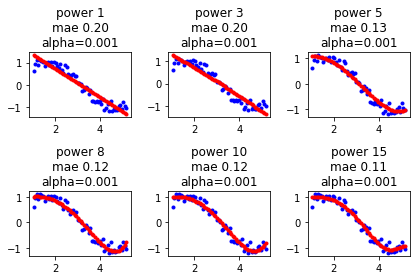

,rss,intercept,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,coef_10,coef_11,coef_12,coef_13,coef_14
power_ 1,3.70598,2.00664,-0.6457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_ 3,3.67583,1.84804,-0.525208,-0.0194117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_ 5,1.60939,0.705939,0.676895,-0.282479,-0.0302746,0.00909077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_ 8,1.316,0.734935,0.438141,-0.13626,-0.0246754,-0.0018118,0.000216948,0.000102133,1.84475e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_10,1.28768,0.715767,0.453282,-0.13599,-0.0253905,-0.00202569,0.000187368,0.00010443,2.14752e-05,2.04776e-06,-4.20063e-07,NaN,NaN,NaN,NaN,NaN
power_15,1.12701,0.678183,0.440151,-0.111245,-0.0243398,-0.00294632,-0.000135906,4.37375e-05,1.70846e-05,3.97919e-06,7.32088e-07,1.08381e-07,1.07601e-08,-4.175e-10,-6.34125e-10,-2.38635e-10


In [13]:
# Lasso alpha = 1e-3, different power
# alpha = 0.001, 0.003..., fix power

cof_df_column = ['rss']
cof_df_column.extend(['intercept'])
cof_df_column.extend(coef_string) 
alpha = [1e-3,3e-3,6e-3,7e-3,12e-3,15e-3] 
power = [1,3,5,8,10,15] 

cof_df = pd.DataFrame([], columns=cof_df_column,index=['power_%2d'%i for i in power])

for i in range(6):
    drawflag = 231+i
    val,size = train(drawflag,'Ridge',df,power[i],1e-3)
    cof_df.iloc[i,0:size]= val

plt.show()
cof_df

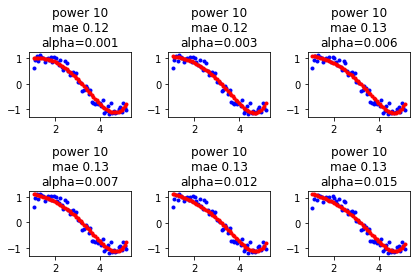

,rss,intercept,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,coef_10,coef_11,coef_12,coef_13,coef_14
alpha_0.001,1.28768,0.715767,0.453282,-0.13599,-0.0253905,-0.00202569,0.000187368,0.00010443,2.14752e-05,2.04776e-06,-4.20063e-07,NaN,NaN,NaN,NaN,NaN
alpha_0.003,1.48932,1.03525,0.145661,-0.0845167,-0.0166897,-0.00183248,-3.90042e-05,3.86347e-05,1.16711e-05,2.08666e-06,1.95044e-07,NaN,NaN,NaN,NaN,NaN
alpha_0.006,1.5929,1.18176,0.0141866,-0.0657552,-0.0131602,-0.00166718,-0.000104759,1.66032e-05,8.07643e-06,1.99691e-06,3.76346e-07,NaN,NaN,NaN,NaN,NaN
alpha_0.007,1.61487,1.21035,-0.0102646,-0.0627382,-0.01253,-0.00162371,-0.000112329,1.34062e-05,7.49269e-06,1.9635e-06,3.97851e-07,NaN,NaN,NaN,NaN,NaN
alpha_0.012,1.6967,1.30189,-0.0861103,-0.0545888,-0.0106329,-0.0014529,-0.000123172,5.88579e-06,5.89714e-06,1.81134e-06,4.30931e-07,NaN,NaN,NaN,NaN,NaN
alpha_0.015,1.7353,1.33591,-0.113759,-0.0520604,-0.00995679,-0.00137544,-0.000122067,4.07733e-06,5.3934e-06,1.73464e-06,4.29216e-07,NaN,NaN,NaN,NaN,NaN


In [14]:
# Ridge alpha = 0.001, 0.003..., fix power

cof_df_column = ['rss']
cof_df_column.extend(['intercept'])
cof_df_column.extend(coef_string) 
alpha = [1e-3,3e-3,6e-3,7e-3,12e-3,15e-3] 
alpha_string = [1e-3,3e-3,6e-3,7e-3,12e-3,15e-3] 
cof_df = pd.DataFrame([], columns=cof_df_column,index=['alpha_%.3f'%i for i in alpha])

power=10
for i in range(6):
    drawflag = 231+i
    val,size = train(drawflag,'Ridge',df,power,alpha[i])
    cof_df.iloc[i,0:size]= val

plt.show()
cof_df

# sklearn 波士頓房價預測資料集

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15
data = load_boston()
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [16]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

505筆資料  
13個維度
-Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's 
        
> CRIM: 人均(per capita)犯罪率  
> ZN: 住宅(residential)地超過25000平方公尺(sq.ft.)的比例  
> INDUS: 非零售業務站地non-retail business acres  
> CHAS: Charles River虛擬變量, 1表示tract(土地) bounds river  
> NOX: 氮氧化物濃度(per 10 million, 千萬分之一)  
> RM: 平均住宅內房間數  
> AGE: 1940年前(prior to 1940)業主單位所佔比例  
> DIS: 到達Boston就業中心的加權距離  
> RAD: 到高速公路的index係數  
> TAX: 稅率(per 10000 美元)  
> PTRATIO: 城鎮師生比(pupil-teacher ratio)  
> B: 1000(Bk - 0.63)^2 城市黑人比率
> LSTAT: 地位較低(low status)的人口比率  
> MEDV:  平均1000美元的私人住房  

In [7]:
print(data['target'][:5])
print(data['data'][:5])

[24.  21.6 34.7 33.4 36.2]
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
